---
# **AI Awareness & Perception Among Youth in Academia**
---

**Description:**  
This project analyzes student perceptions of AI using survey data collected from undergraduates in analytical fields.

**Purpose:**  
To explore patterns in AI awareness, emotional responses, and perceived usefulness—using data science methods like EDA, correlation analysis, and clustering.

> Project submitted for the *Introduction to Data Science* course in the **AI for Sustainable Societies (AISS)** Master's program.

>[🔗 View dataset on Kaggle](https://www.kaggle.com/datasets/gianinamariapetrascu/survey-on-students-perceptions-of-ai-in-education)


---

## **Data Dictionary**   📕
---
**General Notes**:  
- Agreement questions use the scale `(1 = Strongly Disagree, 5 = Fully Agree)`.  
- Numerical scales are on a range of `1-10`, unless specified otherwise.

---

- **Q1_AI_knowledge**: On a scale of 1 to 10, how informed do you think you are about the concept of artificial intelligence?  
  - **1**: Not informed at all  
  - **10**: Extremely informed  

- **Q2.AI_sources**: What sources do you use to learn about the concept of artificial intelligence? (1-Yes, 0-No):  
  - **1**: Internet  
  - **2**: Books/Scientific papers  
  - **3**: Social media  
  - **4**: Discussions with family/friends  
  - **5**: I don't inform myself about AI  

- **Q3: Perceptions of AI (Agreement Scale)**:  
  - **Q3#1.AI_dehumanization**: AI encourages dehumanization.  
  - **Q3#2.Job_replacement**: Robots will replace people at work.  
  - **Q3#3.Societal_benefits**: AI helps solve problems in society (e.g., education, medicine).  
  - **Q3#4.AI_rule_society**: AI will rule society.  

- **Q4: Economic Impacts of AI (Agreement Scale)**:  
  - **Q4#1.Cost_intensity**: AI machinery is expensive and resource-intensive to build/maintain.  
  - **Q4#2.Economic_crisis**: AI will lead to a global economic crisis.  
  - **Q4#3.Economic_growth**: AI will help global economic growth.  
  - **Q4#4.Job_losses**: AI leads to job losses.  

- **Q5.Feelings**: Emotional response to AI:  
  - **1**: Curiosity  
  - **2**: Fear  
  - **3**: Indifference  
  - **4**: Trust  

- **Q6.AI_impact_areas**: In which areas do you think AI would have a big impact?  
  - **1**: Education  
  - **2**: Medicine  
  - **3**: Agriculture  
  - **4**: Constructions  
  - **5**: Marketing  
  - **6**: Public administration  
  - **7**: Art  

- **Q7.Utility_grade**: On a scale of 1 to 10, how useful do you think AI would be in the educational process?  
  - **1**: Not useful at all  
  - **10**: Extremely useful  

- **Q8.Advantage_teaching**: Main advantage of AI in teaching:  
  - **1**: Virtual assistant helps with lessons and Q&A.  
  - **2**: Efficient time management for teachers.  
  - **3**: Interactive and engaging lessons.  
  - **4**: Other.  

- **Q9.Advantage_learning**: Main advantage of AI in learning:  
  - **1**: Personalized lessons.  
  - **2**: Universal access (including students with special needs).  
  - **3**: Interactive and engaging lessons.  
  - **4**: Other.  

- **Q10.Advantage_evaluation**: Main advantage of AI in evaluation:  
  - **1**: Automation of grading.  
  - **2**: Fewer grading errors.  
  - **3**: Continuous feedback for students.  
  - **4**: Other.  

- **Q11.Disadvantage_education**: Main disadvantage of AI in education:  
  - **1**: Lack of teacher-student relationships.  
  - **2**: Internet addiction.  
  - **3**: Fewer teacher-student interactions.  
  - **4**: Loss of information due to system failure.  

- **Q12.Gender**: Respondent gender:  
  - **1**: Female  
  - **2**: Male  

- **Q13.Year_of_study**: Respondent year of study:  
  - **1**: Year 2  
  - **2**: Year 3  

- **Q14.Major**: Respondent major:  
  - **1**: Economic Cybernetics  
  - **2**: Statistics and Economic Forecasting  
  - **3**: Economic Informatics  

- **Q15.Passed_exams**: Did you pass all your exams?  
  - **1**: Yes  
  - **0**: No  

- **Q16.GPA**: What is your GPA for your last year of study? (Note that grades are from 1 to 10):  
  - **1**: 5.0-5.4  
  - **2**: 5.5-5.9  
  - **3**: 6.0-6.4  
  - **4**: 6.5-6.9  
  - **5**: 7.0-7.4  
  - **6**: 7.5-7.9  
  - **7**: 8.0-8.4  
  - **8**: 8.5-8.9  
  - **9**: 9.0-9.4  
  - **10**: 9.5-10  


---
## **Load and Preview Dataset**

We begin by loading the survey data from CSV, renaming the ID column, and displaying the first few entries to understand its structure.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

# Load the dataset
df = pd.read_csv('Survey_AI.csv')

# Set the "ID" column as the index and rename it to "Student_ID"
df.set_index('ID', inplace=True)
df.index.name = 'Student_ID'
df


,Q1.AI_knowledge,Q2.AI_sources,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q3#1.AI_dehumanization,Q3#2.Job_replacement,Q3#3.Problem_solving,...,Q7.Utility_grade,Q8.Advantage_teaching,Q9.Advantage_learning,Q10.Advantage_evaluation,Q11.Disadvantage_educational_process,Q12.Gender,Q13.Year_of_study,Q14.Major,Q15.Passed_exams,Q16.GPA
Student_ID,,,,,,,,,,,,,,,,,,,,,
1,8,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,1,2,5,...,9,3,1,2,3,1,2,2,1,9.2
2,7,Internet;Social media,1,0,1,0,0,2,3,4,...,6,2,2,1,2,2,2,2,1,7.7
3,5,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,2,1,4,...,6,3,3,3,4,2,2,2,0,7.2
4,5,Internet;Social media,1,0,1,0,0,4,4,5,...,9,1,2,2,3,1,2,2,1,8.2
5,4,Internet,1,0,0,0,0,1,2,5,...,8,3,2,3,4,1,2,2,1,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,8,Internet,1,0,0,0,0,1,1,5,...,7,2,2,1,1,2,1,1,1,7.2
88,6,Social media,0,0,1,0,0,2,2,4,...,7,3,1,3,2,2,1,3,1,8.7
89,9,Books/Scientific papers (physical/online format),0,1,0,0,0,1,1,5,...,10,1,2,3,1,2,1,1,0,6.2


---

# **1. Exploratory Data Analysis**   ⚙
---

In this section, we examine the dataset's structure, data types, and distributions to guide further analysis.


---
## **Dataset Overview:**
We begin with a general overview of the dataset to examine the structure, column types, and completeness.


In [3]:
# What kind of features do we have?
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 1 to 91
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Q1.AI_knowledge                       91 non-null     int64  
 1   Q2.AI_sources                         91 non-null     object 
 2   Q2#1.Internet                         91 non-null     int64  
 3   Q2#2.Books/Papers                     91 non-null     int64  
 4   Q2#3.Social_media                     91 non-null     int64  
 5   Q2#4.Discussions                      91 non-null     int64  
 6   Q2#5.NotInformed                      91 non-null     int64  
 7   Q3#1.AI_dehumanization                91 non-null     int64  
 8   Q3#2.Job_replacement                  91 non-null     int64  
 9   Q3#3.Problem_solving                  91 non-null     int64  
 10  Q3#4.AI_rulling_society               91 non-null     int64  
 11  Q4#1.AI_costly            

---
## **Statistical Summary:**
Here we look at the descriptive statistics for numerical variables.


In [4]:
df.describe()


,Q1.AI_knowledge,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q3#1.AI_dehumanization,Q3#2.Job_replacement,Q3#3.Problem_solving,Q3#4.AI_rulling_society,...,Q7.Utility_grade,Q8.Advantage_teaching,Q9.Advantage_learning,Q10.Advantage_evaluation,Q11.Disadvantage_educational_process,Q12.Gender,Q13.Year_of_study,Q14.Major,Q15.Passed_exams,Q16.GPA
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,...,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,5.912088,0.813187,0.351648,0.439560,0.197802,0.065934,2.516484,3.197802,4.197802,2.428571,...,7.439560,1.923077,1.879121,2.252747,2.098901,1.351648,1.626374,1.923077,0.747253,7.798901
std,1.970044,0.391921,0.480130,0.499083,0.400549,0.249542,1.167739,1.213075,1.013462,1.203170,...,2.161321,0.884820,0.680444,0.824532,1.033387,0.480130,0.486446,0.763483,0.436995,0.975306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.200000
25%,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000,...,6.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.500000,7.200000
50%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,4.000000,3.000000,...,8.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,7.700000
75%,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,4.000000,5.000000,3.000000,...,9.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.500000,1.000000,8.700000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,...,10.000000,3.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,1.000000,9.700000


🔹 **Key Observations:**
- AI knowledge averages around 5.9, indicating moderate familiarity.
- Likert-scale items (e.g., AI dehumanization, job replacement) span full 1–5 range, with mid-to-high average scores.
- Binary source variables (Internet, Books, etc.) reflect varied usage across participants.
- Utility grade of AI is relatively high (mean ~7.4).
- GPA values are clustered toward the higher end (mean ~7.8).
-**No missing values across the dataset.**


---
## **Data Quality Checks**
We verify the dataset has no duplicate rows or missing values.


In [5]:
# Any Duplicates?
len(df)
df.duplicated().sum()

np.int64(0)

In [6]:
# Total number of missing values in the entire DataFrame
df.isnull().sum().sum()

np.int64(0)


---
## **Demographic Overview: Gender and Major**


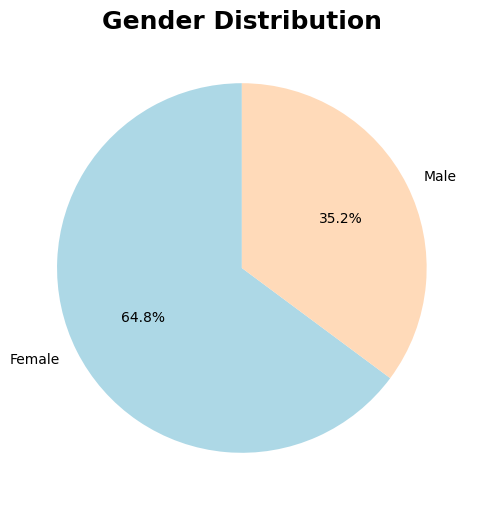

In [7]:
# Plot pie chart for Q12.Gender
gender_counts = df['Q12.Gender'].value_counts()

# Create pie chart with custom labels and counts
gender_counts.plot.pie(
    labels=['Female', 'Male'],  # Ensure order matches your mapping: 1=Female, 2=Male
    autopct='%1.1f%%',
    figsize=(6, 6),
    startangle=90,
    colors=['lightblue', 'peachpuff']
)

plt.title('Gender Distribution', fontsize=18, weight='bold')
plt.ylabel('')  # Remove y-axis label
plt.show()


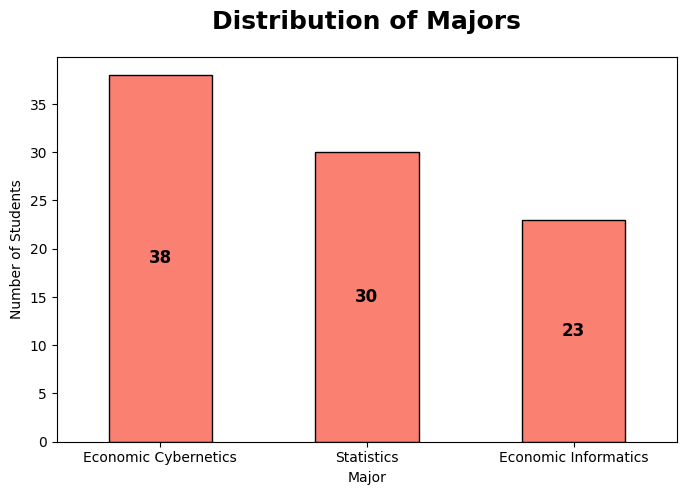

In [8]:
# Plot bar chart for Q14.Major
major_counts = df['Q14.Major'].value_counts()
ax = major_counts.plot.bar(figsize=(8, 5), color='salmon', edgecolor='black')

# Add labels to the bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2,
            int(bar.get_height()),
            ha='center', va='center',
            fontsize=12, color='black', weight='bold')

plt.title('Distribution of Majors', fontsize=18, weight='bold', pad=20)
plt.xlabel('Major')
plt.ylabel('Number of Students')
plt.xticks([0, 1, 2], ['Economic Cybernetics', 'Statistics', 'Economic Informatics'], rotation=0)
plt.show()


---

## **Q1: AI Knowledge Among Students**
---
*We analyze responses to question 1; which asked students to rate their AI knowledge on a scale from 1 to 10.*



count    91.000000
mean      5.912088
std       1.970044
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      10.000000
Name: Q1.AI_knowledge, dtype: float64


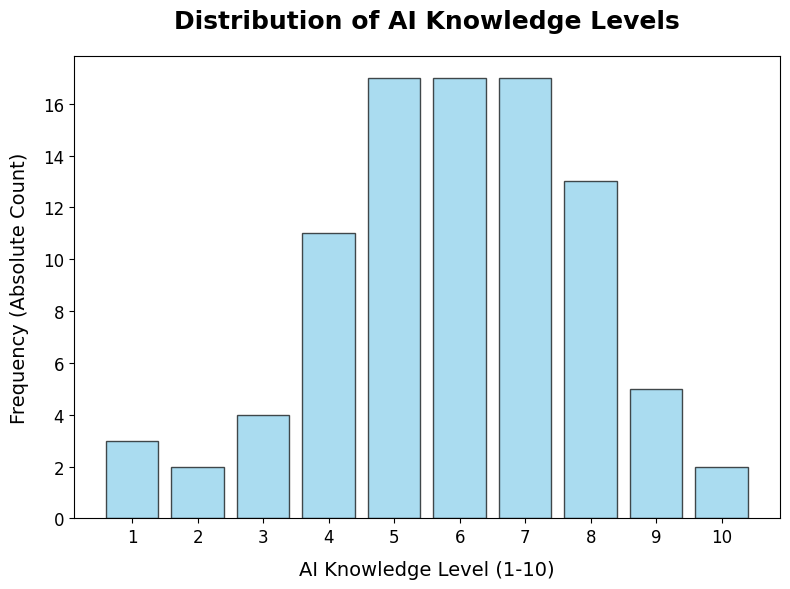

In [9]:
# Summary statistics for Q1_AI_knowledge
print(df['Q1.AI_knowledge'].describe())

# Count the frequency of each AI Knowledge Level
knowledge_counts = df['Q1.AI_knowledge'].value_counts().sort_index()

# Bar chart for AI Knowledge Levels
plt.figure(figsize=(8, 6))
plt.bar(knowledge_counts.index, knowledge_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of AI Knowledge Levels', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('AI Knowledge Level (1-10)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Absolute Count)', fontsize=14, labelpad=10)
plt.xticks(knowledge_counts.index, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


🔹 **Key Observations:**
- Most respondents rate themselves moderately knowledgeable about AI.

- Responses are well-distributed, with fewer participants at the extremes (1 or 10), indicating a balanced understanding across the group.

---

## **Q2: Where Do Students Learn About AI?**

---

*We examine how students reported learning about AI, including both formal (e.g., books) and informal (e.g., social media) sources.*


'Internet' as a source: 74
'Books' as a source: 32
'Social media' as a source: 40
'Discussions' as a source: 18
'I don't inform myself about AI' as a source: 6


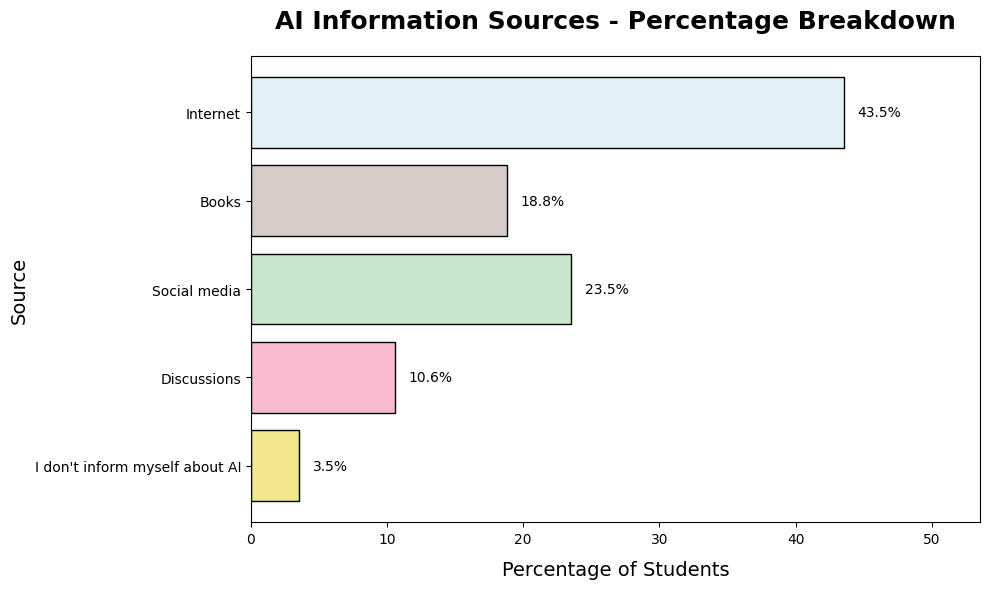

In [10]:
# How many students use each separate source?

# Binary columns for each AI source (combined loop)
sources = ['Internet', 'Books', 'Social media', 'Discussions', "I don't inform myself about AI"]
source_counts = {}  # Initialize source_counts here

for source in sources:
    sanitized_source = source.replace(" ", "_").replace("'", "")
    column_name = f'AI source {sanitized_source}'
    df[column_name] = df['Q2.AI_sources'].str.contains(source, na=False).astype(int)
    source_counts[source] = df[column_name].sum()  # Calculate and store counts directly
    print(f"'{source}' as a source: {source_counts[source]}")

# Calculate percentages
total_responses = sum(source_counts.values())
source_percentages = {source: (count / total_responses) * 100 for source, count in source_counts.items()}

# Creating horizontal bar chart
plt.figure(figsize=(10, 6))
colors = ['#e0f2f7', '#d7ccc8', '#c8e6c9', '#f8bbd0', '#f0e68c']
bars = plt.barh(list(source_percentages.keys()), list(source_percentages.values()), color=colors, edgecolor='black')
plt.xlim(0, max(source_percentages.values()) + 10)  # Add space to the right

plt.title('AI Information Sources - Percentage Breakdown', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Percentage of Students', fontsize=14, labelpad=10)
plt.ylabel('Source', fontsize=14)

# Add percentage labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}%', ha='left', va='center', fontsize=10)

plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


🔹 **Key Observations:**

- Internet is the dominant source (~44%), followed by social media and books.
- Fewer students rely on discussions or report not seeking AI information at all.
- Results suggest mixed learning preferences, skewed toward digital and informal platforms.


---

## **Q3: Perceptions Of AI Among Students**

---
*Students were asked to rate their agreement with four AI-related statements using a Likert scale (1–5). The chart below shows the response distribution.*

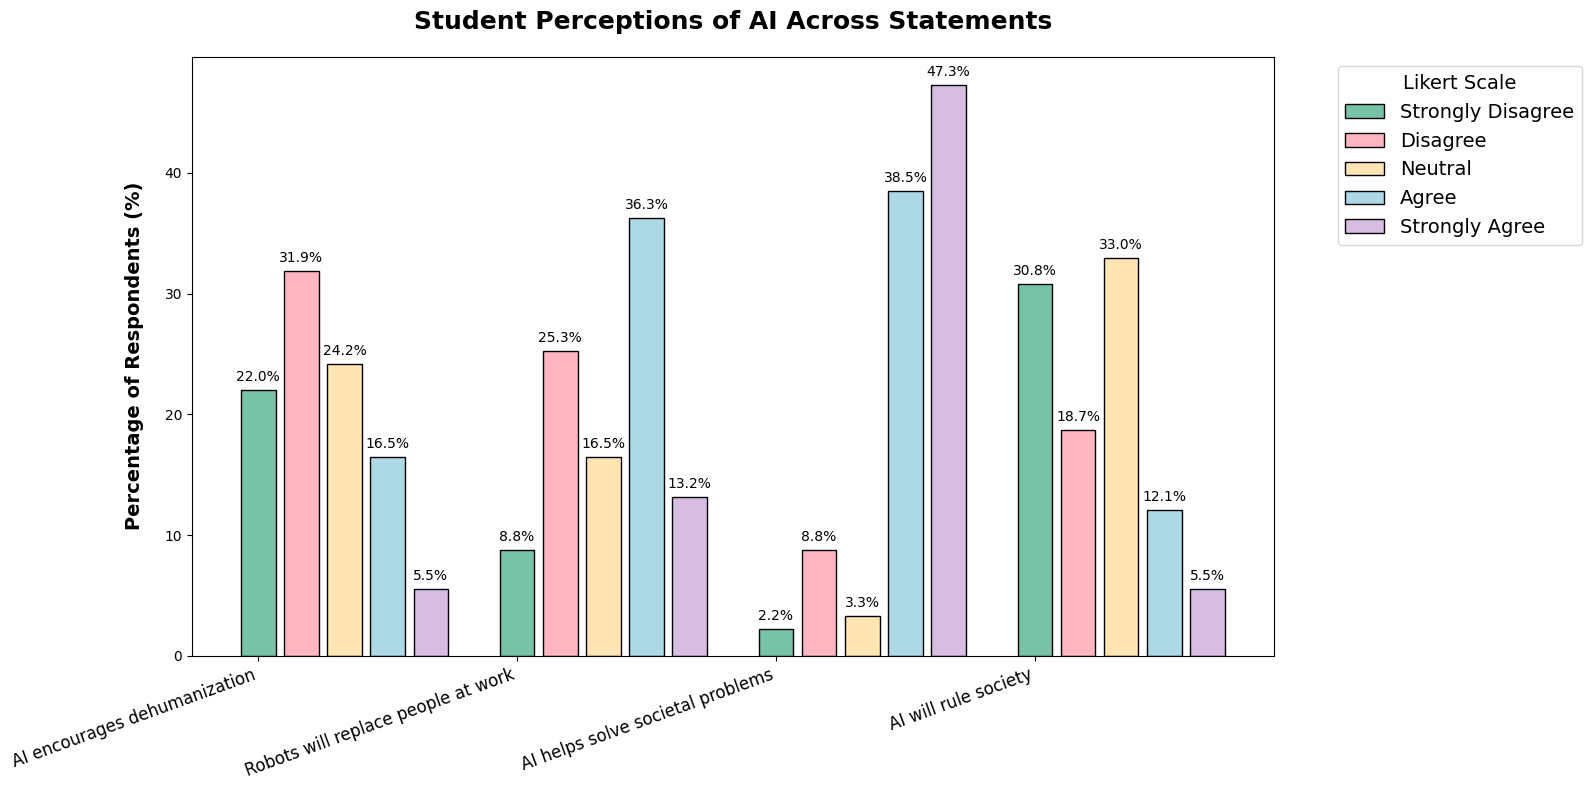

In [11]:
# Define Q3 statements and corresponding column names
q3_statements = {
    "AI encourages dehumanization": "Q3#1.AI_dehumanization",
    "Robots will replace people at work": "Q3#2.Job_replacement",
    "AI helps solve societal problems": "Q3#3.Problem_solving",
    "AI will rule society": "Q3#4.AI_rulling_society"
}

# Define Likert scale labels and colors (simplified)
likert_labels = ["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"]
colors = ['#78C3A6', '#FFB6C1', '#FFE5B4', '#ADD8E6', '#D7BDE2']

# Create a figure for the plot
plt.figure(figsize=(16, 8))

# Loop through statements and create bars
for i, (statement, column_name) in enumerate(q3_statements.items()):
    # Get response percentages for the current statement
    percentages = df[column_name].value_counts(normalize=True).sort_index() * 100

    # Create bars for each Likert scale response
    for j, likert_label in enumerate(likert_labels):
        percentage = percentages.get(j + 1, 0)  # Get percentage for the current response
        plt.bar(i * 6 + j, percentage, width=0.8, label=likert_label if i == 0 else "", color=colors[j], edgecolor='black')
        plt.text(i * 6 + j, percentage + 0.5, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title("Student Perceptions of AI Across Statements", fontsize=18, fontweight='bold', pad=20)
plt.ylabel("Percentage of Respondents (%)", fontsize=14, fontweight='bold', labelpad=15)
plt.xticks(range(0, len(q3_statements) * 6, 6), list(q3_statements.keys()), rotation=20, ha='right', fontsize=12) # Centered below bars
plt.legend(title="Likert Scale", fontsize=14, title_fontsize=14, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

# Show the plot
plt.show()

🔹 **Key Observations:**

- Most students believe AI can solve societal problems (Q3#3), showing optimistic perceptions.
- There’s notable disagreement with “AI encourages dehumanization,” indicating skepticism toward dystopian fears.
- Mixed views on AI replacing jobs suggest divided expectations about AI's economic impact.


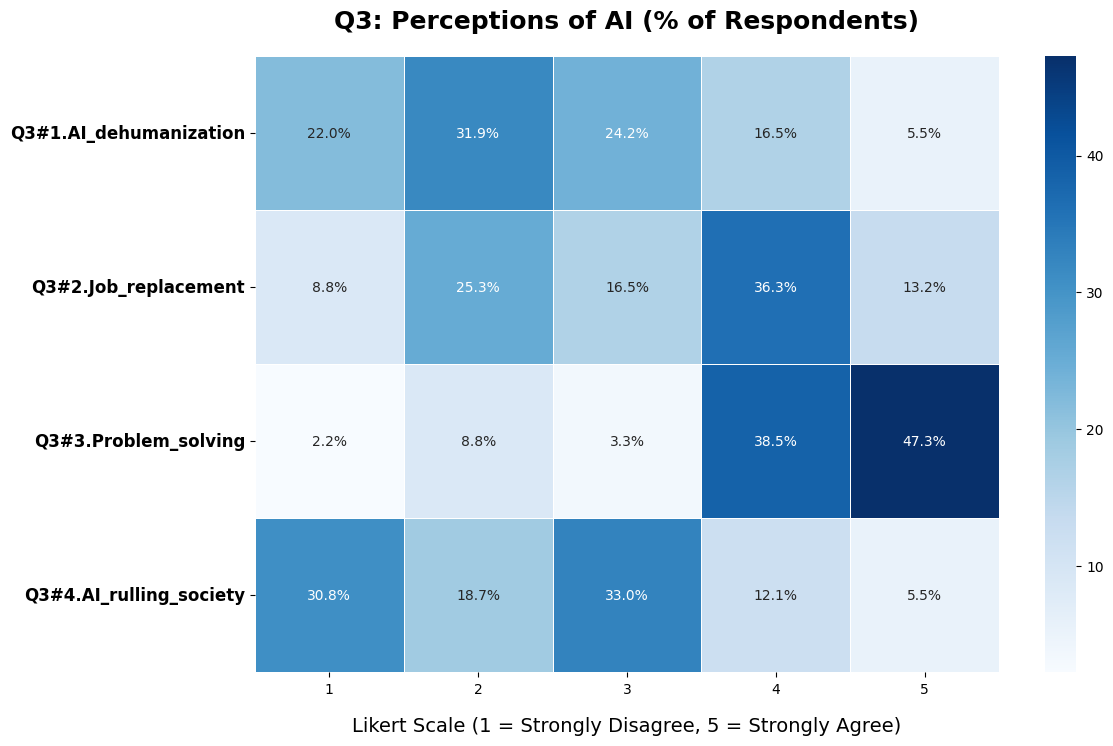

In [12]:
# Columns to analyze
columns = ['Q3#1.AI_dehumanization', 'Q3#2.Job_replacement', 'Q3#3.Problem_solving', 'Q3#4.AI_rulling_society']

# Calculate response percentages for each statement and Likert scale value
response_percentages = {}
for column in columns:
    response_percentages[column] = df[column].value_counts(normalize=True).sort_index() * 100

# Prepare heatmap data
heatmap_data = pd.DataFrame(response_percentages).T.fillna(0)

# Plot heatmap with enhanced visual settings
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="Blues",
    fmt="",
    linewidths=0.5,
    annot_kws={"size": 10}
)

# Update annotations to include percentage signs
for text in ax.texts:
    text.set_text(f"{float(text.get_text()):.1f}%")

# Set title and axis labels
plt.title("Q3: Perceptions of AI (% of Respondents)", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Likert Scale (1 = Strongly Disagree, 5 = Strongly Agree)", fontsize=14, labelpad=15)
plt.ylabel("")

# Align y-axis labels for better readability
plt.yticks(rotation=0, fontsize=12, weight='bold')

# Remove the colorbar title (Likert Scale label)
ax.collections[0].colorbar.set_label(None)

# Show the plot
plt.show()


🔹 **Key Observations:**

- Rather clear agreement on AI's problem-solving potential (Q3#3).
- Polarized views on job displacement (Q3#2).
- Skepticism around AI dominance (Q3#4) and dystopian fears (Q3#1).


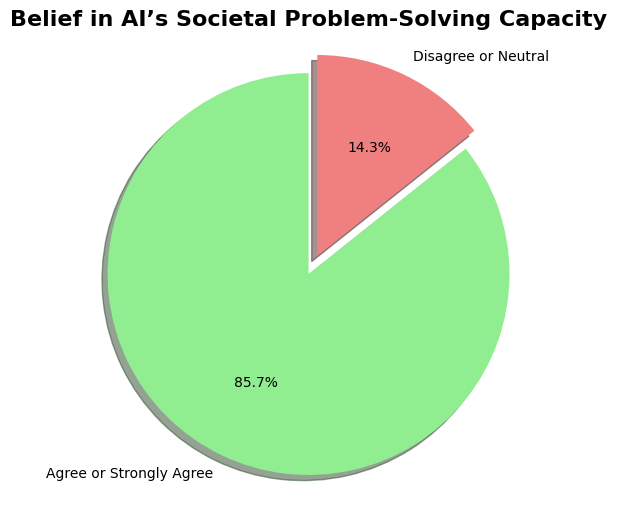

A strong majority (85.71%) agree or strongly agree that AI can help address societal challenges.





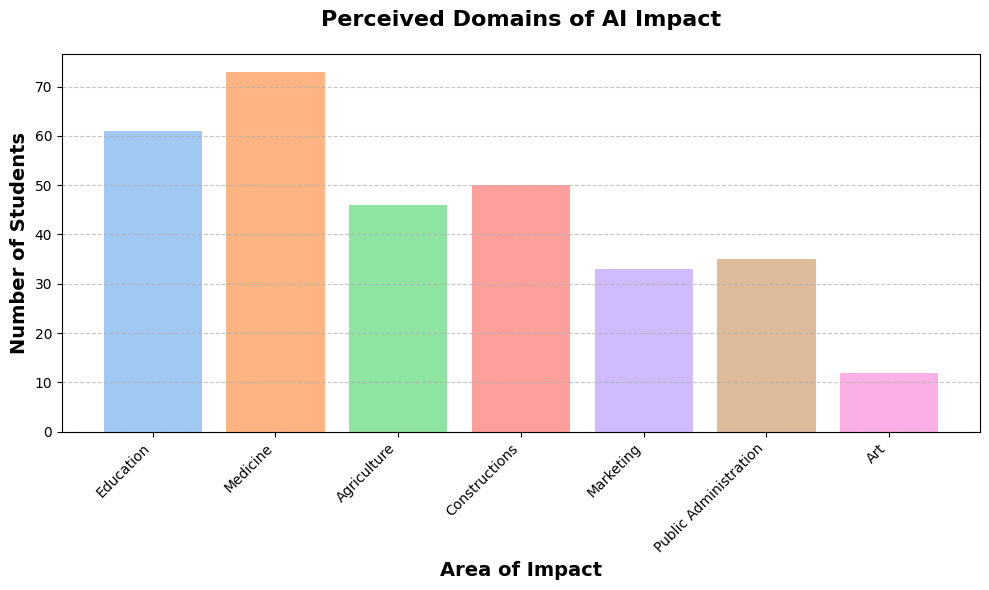

In [32]:
# Calculate the percentage for the pie chart
agreement_percentage = (df['Q3#3.Problem_solving'][df['Q3#3.Problem_solving'] >= 4].count() / len(df)) * 100

# Create a pie chart
labels = ['Agree or Strongly Agree', 'Disagree or Neutral']
sizes = [agreement_percentage, 100 - agreement_percentage]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(6, 6))  # Adjusting size for the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Belief in AI’s Societal Problem-Solving Capacity', fontsize=16, fontweight='bold')
plt.show()

# Print the percentage
print(f"A strong majority ({agreement_percentage:.2f}%) agree or strongly agree that AI can help address societal challenges.\n\n\n")

# Bar chart for Perceived Domains of AI Impact
plt.figure(figsize=(10, 6))
impact_columns = ['Q6#1.Education', 'Q6#2.Medicine', 'Q6#3.Agriculture', 'Q6#4.Constructions', 'Q6#5.Marketing', 'Q6#6.Administration', 'Q6#7.Art']
area_labels = ['Education', 'Medicine', 'Agriculture', 'Constructions', 'Marketing', 'Public Administration', 'Art']
area_counts = df[impact_columns].sum()
impact_data = pd.DataFrame({'Area': area_labels, 'Count': area_counts})

colors = sns.color_palette("pastel", len(impact_data))
plt.bar(impact_data['Area'], impact_data['Count'], color=colors)
plt.title("Perceived Domains of AI Impact", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Area of Impact", fontsize=14, fontweight='bold')
plt.ylabel("Number of Students", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

🔹 **Key Observations:**

- **High optimism:** Over 85% believe AI can address societal challenges.
- **Low skepticism:** Only 14% express neutrality or doubt.
- **Domain relevance:** Healthcare and education are seen as most impacted, while Marketing and Art—despite AI relevance—are less recognized.


---

## **Q5: Sentiment Towards AI Among Students**

---

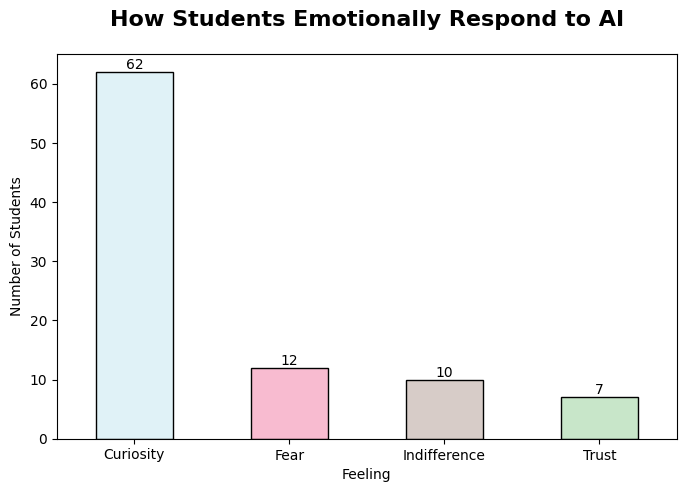

In [34]:
# Mapping feelings to descriptions
df['Q5.Feelings'] = df['Q5.Feelings'].replace({
    1: 'Curiosity',
    2: 'Fear',
    3: 'Indifference',
    4: 'Trust'
})

# The frequency of each sentiment
sentiment_counts = df['Q5.Feelings'].value_counts()

# Define colors for the bar chart
colors = ['#e0f2f7', '#f8bbd0', '#d7ccc8', '#c8e6c9']

# The bar chart
ax = sentiment_counts.plot(kind='bar', figsize=(8, 5), color=colors, edgecolor='black')

# Title and labels
plt.title('How Students Emotionally Respond to AI', fontsize=16, weight='bold', pad=20)
plt.xlabel('Feeling')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)

# Annotated bars with counts
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

# Display the chart
plt.show()

🔹 **Key Observations:**

**- Curiosity** is the dominant sentiment (62 students), suggesting a strong interest and eagerness to explore AI. Perhaps a healthy dose of skepticism.

**- Low levels of Trust** (7 students) and **Fear** (12 students) indicate a potential lack of confidence or apprehension, which might impact AI adoption.

(MO): I was expecting fear to dominate more than anything else.

**Next Steps:** Investigate how these sentiments correlate with AI knowledge levels (Q1) or usefulness ratings (Q7).

---

## **Q7: How Useful Do Students find AI in education?**

---

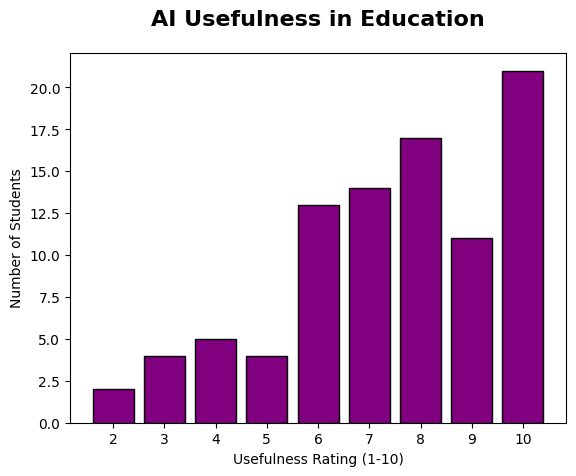

In [15]:
# Count the frequency of each rating
rating_counts = df['Q7.Utility_grade'].value_counts().sort_index()

# Create a bar chart
plt.bar(rating_counts.index, rating_counts.values, color='purple', edgecolor='black')
plt.title('AI Usefulness in Education', fontsize=16, weight='bold', pad=20)
plt.xlabel('Usefulness Rating (1-10)')
plt.ylabel('Number of Students')
plt.xticks(rating_counts.index)  # To show all rating levels on the x-axis
plt.show()

🟦 **Key Observations:**

- **Strong Positive Perception:** A clear majority of students rated AI’s usefulness between 6 and 10, with a sharp peak at 10, suggesting overall enthusiasm and perceived value.

- **Limited Skepticism:** A small number of lower ratings (2–5) point to minimal resistance or concern about AI’s role in education.

📌 **Next Steps:**

- Explore how perceived usefulness (Q7) correlates with students’ AI knowledge (Q1), gender (Q12), or primary AI information sources (Q2).

- Consider comparing usefulness ratings across different majors (Q14) to identify disciplinary differences in AI perception.


---

# **2. Relationships Between Variables**


---


After conducting the initial EDA, we explore potential relationships between key variables:

- **Q1 vs. Q2:** Do students who use specific sources (e.g., Internet, Books, Social Media) report higher levels of AI knowledge?

- **Q1 vs. Q3:** Is higher AI knowledge associated with stronger agreement or disagreement on perceptions of AI (e.g., dehumanization, job replacement)?

- **Q1 vs. Q5:** Does AI knowledge correlate with emotional responses like curiosity, fear, indifference, or trust?

- **Q1 vs. Q7:** Are students who find AI more useful in education (Q7) also more knowledgeable about AI (Q1)?

- **Q1 vs. Q12/Q14:** Are there differences in AI knowledge by gender (Q12) or major (Q14)?

- **Q3 vs. Q12/Q14:** Do AI perceptions differ significantly between genders or across different majors?

- **Q3 vs. Q7:** Are specific AI perceptions (e.g., societal benefits or fears) linked to how useful students find AI in education?


---

## **Correlation Matrix: Q1, Q3, Q5, and Q7**


---

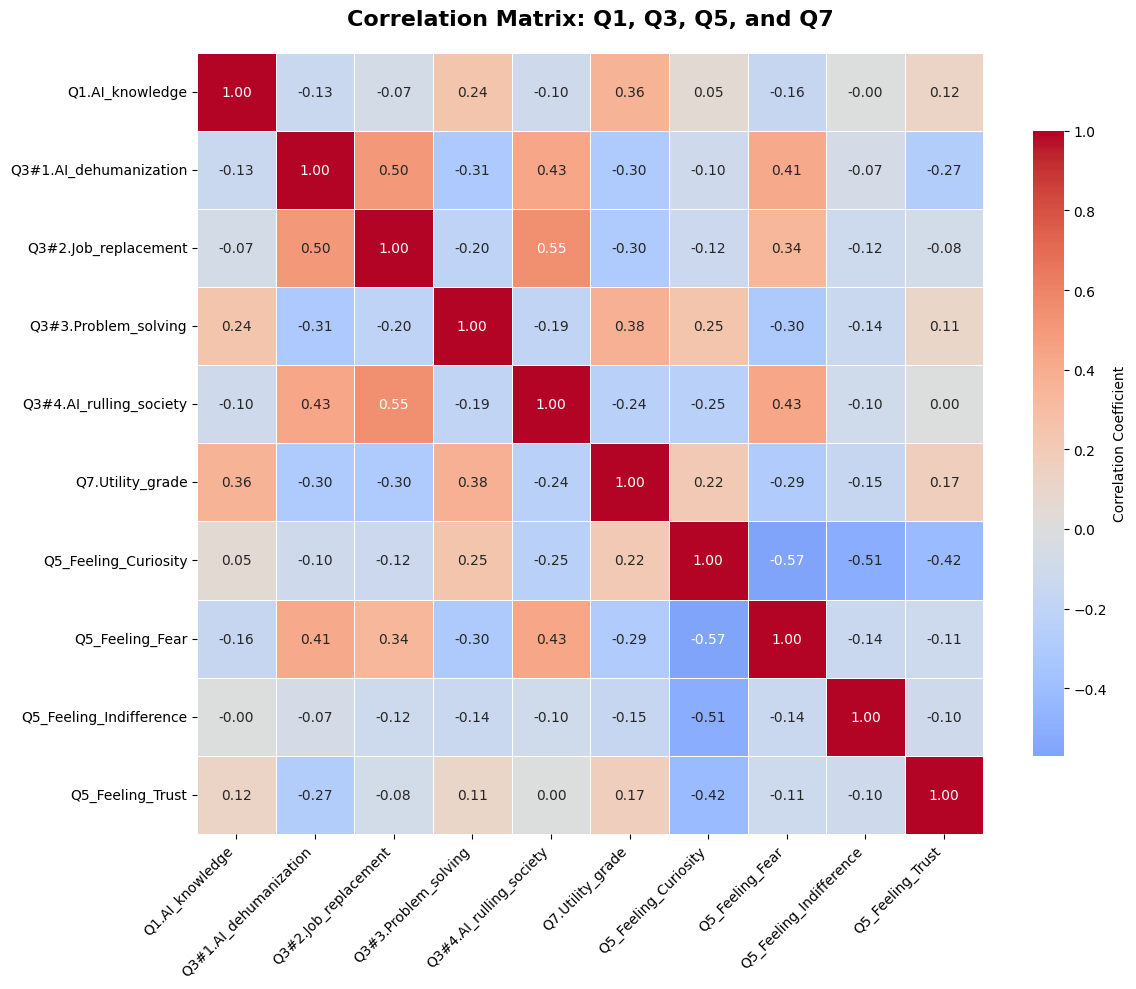

In [16]:
# Step 1: Select columns and create dummy variables
selected_cols = ['Q1.AI_knowledge', 'Q3#1.AI_dehumanization', 'Q3#2.Job_replacement',
                 'Q3#3.Problem_solving', 'Q3#4.AI_rulling_society', 'Q7.Utility_grade',
                 'Q5.Feelings']
filtered_df = df[selected_cols].copy()

# Create dummy variables for 'Q5.Feelings' and add them to the DataFrame
feelings_dummies = pd.get_dummies(filtered_df['Q5.Feelings'], prefix='Q5_Feeling')
filtered_df = pd.concat([filtered_df, feelings_dummies], axis=1)

# Remove the original 'Q5.Feelings' column as it's no longer needed
filtered_df.drop('Q5.Feelings', axis=1, inplace=True)

# Step 2: Calculate and plot the correlation matrix
correlation_matrix = filtered_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            annot_kws={"size": 10})

plt.title("Correlation Matrix: Q1, Q3, Q5, and Q7", fontsize=16, weight="bold", pad=20)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### 🔷 Key Observations:

- **AI Knowledge (Q1) and Utility Grade (Q7)** show a moderate positive correlation (0.36), suggesting that students who know more about AI also find it more useful in education.

- **AI Knowledge (Q1) and Problem Solving (Q3#3)** are moderately correlated (0.24), indicating students with greater AI knowledge tend to view AI as beneficial for solving societal problems.

- **AI Dehumanization (Q3#1) and Job Replacement (Q3#2)** have a strong correlation (0.50), suggesting that concerns over AI's role in dehumanization often co-occur with fears of AI-driven job loss.

- **Job Replacement (Q3#2) and AI Ruling Society (Q3#4)** also show a strong correlation (0.55), hinting that fears about job loss may be tied to broader concerns about AI’s societal dominance.

- **Feelings Toward AI (Q5)**: Emotional responses like curiosity, fear, and trust have weak correlations with other variables, suggesting these feelings might stem from personal experiences rather than from knowledge or perceived usefulness of AI.

> *These relationships suggest that while knowledge and usefulness are linked, emotional responses to AI may operate independently, offering an avenue for further qualitative exploration.*


---

# **AI Knowledge Scores (Q1) –– Source of Information (Q2)**


---


In [17]:
df.groupby('Q2.AI_sources')['Q1.AI_knowledge'].mean()


,Q1.AI_knowledge
Q2.AI_sources,
Books/Scientific papers (physical/online format),7.000000
Books/Scientific papers (physical/online format);Social media;Discussions with family/friends,7.000000
Discussions with family/friends,2.000000
I don't inform myself about AI,2.833333
Internet,5.280000
Internet;Books/Scientific papers (physical/online format),6.800000
Internet;Books/Scientific papers (physical/online format);Discussions with family/friends,6.500000
Internet;Books/Scientific papers (physical/online format);Social media,6.666667
Internet;Books/Scientific papers (physical/online format);Social media;Discussions with family/friends,7.000000


**- Books and Comprehensive Sources Lead:** Students who reported using Books/Scientific Papers alone or in combination with other sources (e.g., Internet, Social Media) consistently have an average AI knowledge of 7.0. This indicates that books may provide deeper or more structured learning about AI.

**- Internet Alone:** Relying solely on the Internet for AI information has an average score lower than books but still moderate. This might suggest that while the internet is popular, it may lack depth compared to books.

**- Mixed Sources Are Better:** Combinations like Internet + Books + Social Media yield higher averages, often approaching 7.0, suggesting that diversified sources provide a well-rounded understanding.



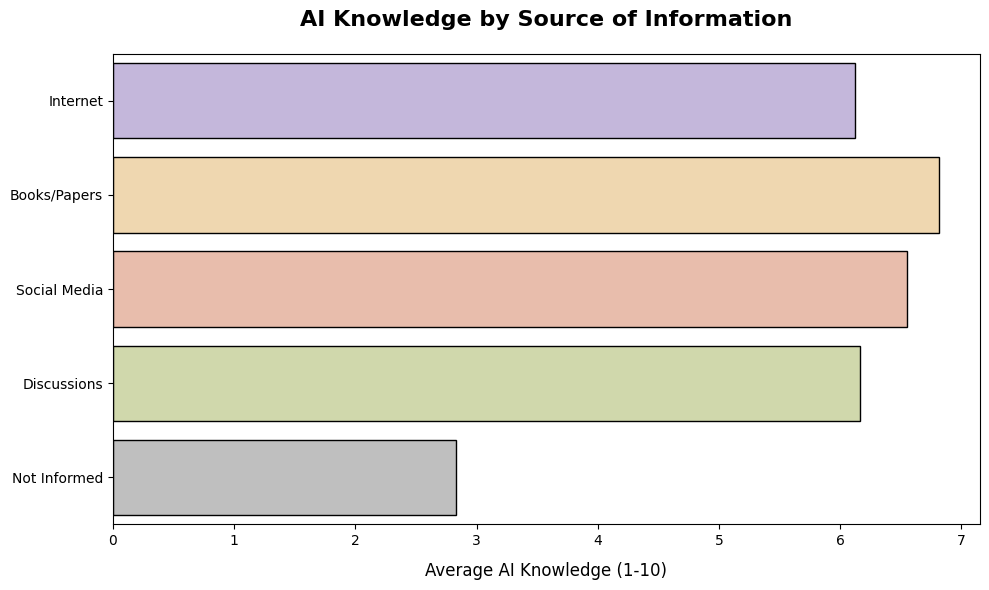

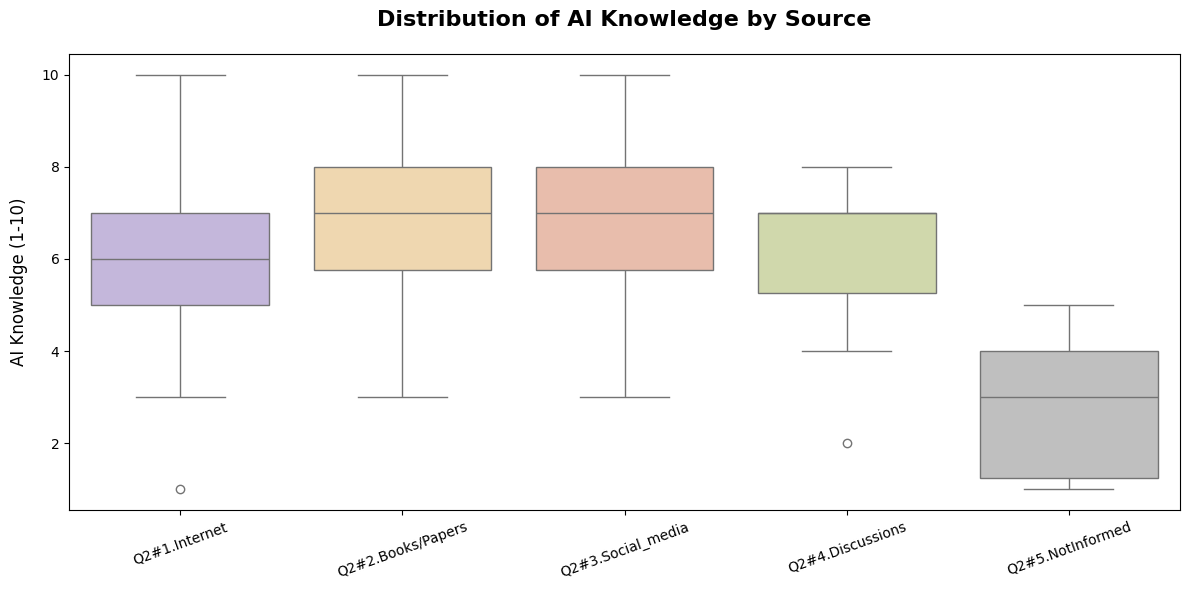

In [18]:
# Define Q2 sources and AI knowledge column
sources = {
    "Internet": "Q2#1.Internet",
    "Books/Papers": "Q2#2.Books/Papers",
    "Social Media": "Q2#3.Social_media",
    "Discussions": "Q2#4.Discussions",
    "Not Informed": "Q2#5.NotInformed"
}

# Prepare data for analysis
source_knowledge = {}
for source, column in sources.items():
    source_knowledge[source] = df[df[column] == 1]["Q1.AI_knowledge"].mean()

# Convert to DataFrame for easier plotting
source_knowledge_df = pd.DataFrame(
    list(source_knowledge.items()),
    columns=["Source", "Average AI Knowledge"]
)

# softer, distinct color palette
soft_colors = ['#C3B1E1', '#F9D9A6', '#F2B8A2', '#D4E0A4', '#BFBFBF']

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Average AI Knowledge", y="Source",
    data=source_knowledge_df, palette=soft_colors, edgecolor="black", hue="Source", legend=False
)
plt.title("AI Knowledge by Source of Information", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Average AI Knowledge (1-10)", fontsize=12, labelpad=10)
plt.ylabel("", fontsize=12, labelpad=10)
plt.tight_layout()
plt.show()

#Box plot for distributions
plt.figure(figsize=(12, 6))
melted_data = pd.melt(
    df, id_vars=["Q1.AI_knowledge"],
    value_vars=list(sources.values()),
    var_name="Source", value_name="Uses Source"
)
melted_data = melted_data[melted_data["Uses Source"] == 1]  # Filter for students who use each source

sns.boxplot(
    x="Source", y="Q1.AI_knowledge",
    data=melted_data, palette=soft_colors, hue="Source", legend=False
)
plt.title("Distribution of AI Knowledge by Source", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("", fontsize=12, labelpad=10)
plt.ylabel("AI Knowledge (1-10)", fontsize=12, labelpad=10)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### 🔹 Key Observations:

#### Bar Plot Insights
- **Books/Papers** lead with the highest average AI knowledge scores, suggesting deep and structured learning.
- **Internet (including Social Media)** follows closely, showing its broad accessibility and informative role.
- **Discussions** contribute moderately, but may lack depth compared to written sources.

#### Box Plot Insights
- **Books/Papers:** High median with wider spread, indicating both high and low knowledge among users.
- **Internet (incl. Social Media):** Also shows wide variability, reflecting diverse experience levels.
- **Discussions:** More consistent but moderate knowledge range.

#### Summary
- **Top Source:** Books and scientific papers are the strongest predictors of AI knowledge depth.
- **Strong Contributor:** Internet remains a vital source due to its reach and flexibility.


---

## **AI Knowledge by Gender and Major**


---

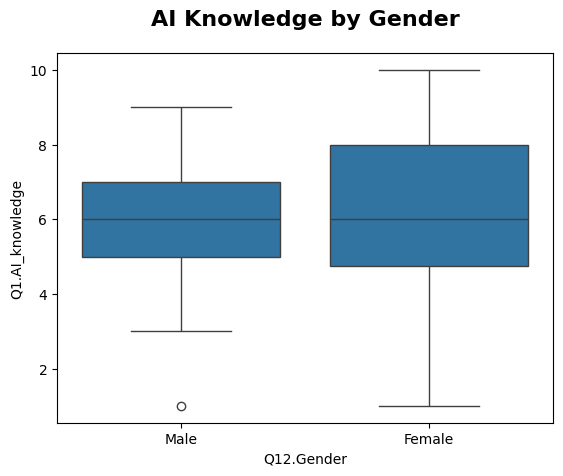

T-statistic: -0.20098263986334788, P-value: 0.8411707529940903


In [19]:
sns.boxplot(x='Q12.Gender', y='Q1.AI_knowledge', data=df)
plt.title('AI Knowledge by Gender', fontsize=16, fontweight='bold', pad=20)

# Assuming 'Q12.Gender' has values 1 and 2 for Male and Female:
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# T-test
male_knowledge = df[df['Q12.Gender'] == 1]['Q1.AI_knowledge']
female_knowledge = df[df['Q12.Gender'] == 2]['Q1.AI_knowledge']
t_statistic, p_value = stats.ttest_ind(male_knowledge, female_knowledge)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

🔹 **Key Observations:**

- The t-test results indicate that there is no statistically significant difference in AI knowledge levels between males and females.
- The high p-value (0.841) suggests that any observed differences in the box plot are likely due to random variation rather than a true difference between the groups.
- Therefore, based on this analysis, **we cannot conclude that females have more knowledge of AI than males.**

T-test Results for comparisons:
Statistics vs Economic Informatics: t = 0.05, p = 0.957
Statistics vs Economic Cybernetics: t = 1.52, p = 0.133
Economic Informatics vs Economic Cybernetics: t = 1.25, p = 0.216


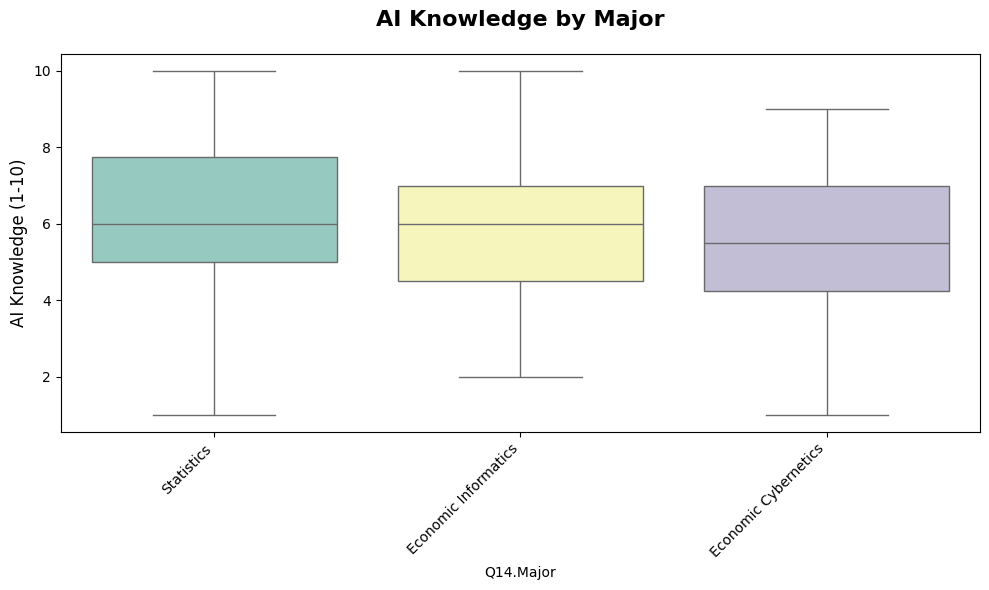

In [20]:
# Get a dictionary mapping major codes to their full names
major_names = {
    1: 'Economic Cybernetics',
    2: 'Statistics',
    3: 'Economic Informatics'
}

# Replace major codes with full names in  DataFrame
df['Q14.Major'] = df['Q14.Major'].map(major_names)

# Drop rows with NaN values in 'Q14.Major'
df = df.dropna(subset=['Q14.Major'])

# Box Plot Visualization
plt.figure(figsize=(10, 6))

# Addressing the FutureWarning:
sns.boxplot(x='Q14.Major', y='Q1.AI_knowledge', data=df, hue='Q14.Major', palette="Set3", dodge=False, legend=False)

# dodge=False to keep boxes aligned, legend=False to hide legend

plt.title('AI Knowledge by Major', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('AI Knowledge (1-10)', fontsize=12)  # Removed unnecessary xlabel
plt.xticks(rotation=45, ha='right')

# Simplified T-tests and Annotations
majors = df['Q14.Major'].unique()
for i, major1 in enumerate(majors):
    for j, major2 in enumerate(majors):
        if i < j:
            group1 = df[df['Q14.Major'] == major1]['Q1.AI_knowledge']
            group2 = df[df['Q14.Major'] == major2]['Q1.AI_knowledge']
            t_statistic, p_value = stats.ttest_ind(group1, group2)

            if p_value < 0.05:
                x_pos = (i + j) / 2
                y_pos = df['Q1.AI_knowledge'].max() + 0.5
                plt.annotate(f"{major1} vs {major2}\n"
                             f"t={t_statistic:.2f}, p={p_value:.3f}",
                             xy=(x_pos, y_pos), ha='center', va='bottom', fontsize=10)

# Print t-test results
print("T-test Results for comparisons:")
for i, major1 in enumerate(majors):
    for j, major2 in enumerate(majors):
        if i < j:
            group1 = df[df['Q14.Major'] == major1]['Q1.AI_knowledge']
            group2 = df[df['Q14.Major'] == major2]['Q1.AI_knowledge']
            t_statistic, p_value = stats.ttest_ind(group1, group2)
            print(f"{major1} vs {major2}: t = {t_statistic:.2f}, p = {p_value:.3f}")


plt.tight_layout()
plt.show()

🔹 **Key Observations:**

**Lack of Statistically Significant Differences:** The p-values for all t-tests are greater than 0.05, indicating that there are no statistically significant differences in AI knowledge scores across the three majors.
This suggests that the majors are relatively homogeneous in terms of students’ AI knowledge.

**Uniform Knowledge Levels:**

This might indicate that students across all three majors are exposed to similar levels of education or resources regarding AI knowledge.

---

## **AI Knowledge Vs. AI Sentiments**


---

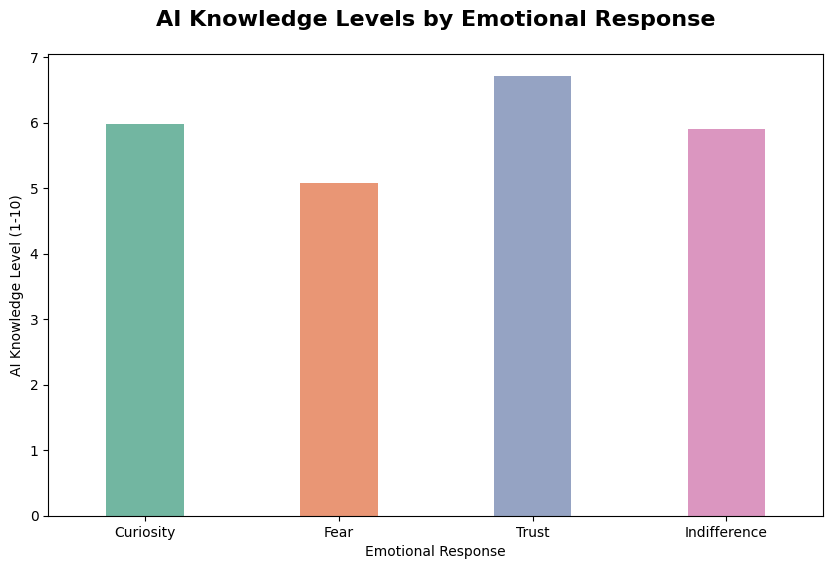

ANOVA Test Results
F-statistic: 1.127089304772213
p-value: 0.34264578558472786
No statistically significant differences between groups.


In [21]:
# Extract relevant columns and clean the data
anova_data = df[['Q1.AI_knowledge', 'Q5.Feelings']].dropna()

# Bar chart visualization
plt.figure(figsize=(10, 6))

# Get the default bar width
default_width = 0.8  # Seaborn's default width for barplot

# Create the bar plot with half the default width
sns.barplot(x='Q5.Feelings', y='Q1.AI_knowledge', data=anova_data,
            hue='Q5.Feelings', palette='Set2', dodge=False, errorbar=None,
            width=default_width / 2)  # Set width to half the default

plt.title('AI Knowledge Levels by Emotional Response', fontsize=16, weight='bold', pad=20)
plt.xlabel('Emotional Response')
plt.ylabel('AI Knowledge Level (1-10)')
plt.show()

# Group data by 'Q5.Feelings' for ANOVA
groups = [anova_data.loc[anova_data['Q5.Feelings'] == category, 'Q1.AI_knowledge']
          for category in anova_data['Q5.Feelings'].unique()]

# Perform the ANOVA test
anova_result = stats.f_oneway(*groups)

# Output results
print("ANOVA Test Results")
print(f"F-statistic: {anova_result.statistic}")
print(f"p-value: {anova_result.pvalue}")

# Interpretation
if anova_result.pvalue < 0.05:
    print("The differences between groups are statistically significant.")
else:
    print("No statistically significant differences between groups.")

🔹 **Key Observations:**
- The high p-value (0.343) exceeds the standard threshold of 0.05, suggesting that any observed differences in the box plot are likely due to random variation rather than true differences among the groups.
- We cannot conclude that emotional responses strongly impact AI knowledge levels.

Correlation between AI Knowledge and Feelings:

     Feeling  Correlation  P-value
   Curiosity     0.053573 0.614017
        Fear    -0.164864 0.118366
       Trust     0.118199 0.264474
Indifference    -0.002168 0.983729





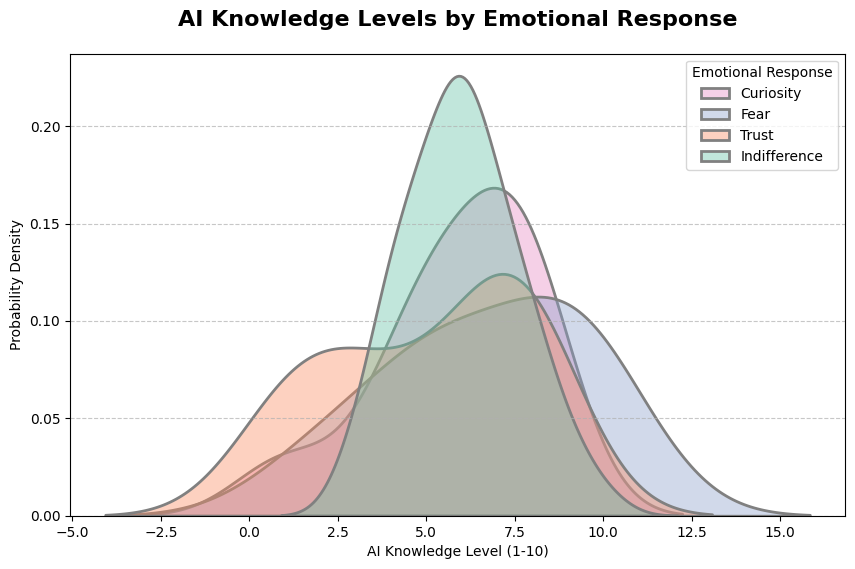

In [22]:
# 1. Encode Q5.Feelings
if df['Q5.Feelings'].dtype == 'object':
    df['Q5.Feelings_Encoded'] = pd.factorize(df['Q5.Feelings'])[0]
else:
    df['Q5.Feelings_Encoded'] = df['Q5.Feelings']

# 2. Calculate and display correlation
results = [[feeling, *stats.pointbiserialr(df['Q5.Feelings'] == feeling, df['Q1.AI_knowledge'])]
           for feeling in df['Q5.Feelings'].unique()]
correlation_df = pd.DataFrame(results, columns=['Feeling', 'Correlation', 'P-value'])
print("\033[1mCorrelation between AI Knowledge and Feelings:\033[0m\n")
print(correlation_df.to_string(index=False))
print("\n\n")

# 3. KDE plot
plt.figure(figsize=(10, 6))

# Get unique feelings for legend labels
unique_feelings = df['Q5.Feelings'].unique()

# Use hue and common_norm=False
sns.kdeplot(
    x='Q1.AI_knowledge',
    hue='Q5.Feelings',
    data=df,
    fill=True,
    alpha=0.4,
    linewidth=2,
    palette='Set2',
    edgecolor='grey',
    common_norm=False
)

plt.title('AI Knowledge Levels by Emotional Response', fontsize=16, weight='bold', pad=20)
plt.xlabel('AI Knowledge Level (1-10)')
plt.ylabel('Probability Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Manually set legend labels for clarity
plt.legend(title='Emotional Response', fontsize=10, frameon=True, labels=unique_feelings)

plt.show()

🔹 **Key Observations:**

Unfortunately these visualizations confirm a lack of strong statistical relationships in our data.

The overlap and similarity in distributions across emotional responses suggest:


1.   **No Strong Correlations:** Emotional responses and AI knowledge appear largely independent of each other.


2.  **High Variability:** The wide spread of data within categories indicates that emotional responses may not predict or align meaningfully with knowledge levels.


**Statistical Confirmation:**
The lack of strong patterns in the visualizations reflects weak correlations. High p-values for correlations (e.g., between knowledge and emotions) confirms this lack of significance.

---

## **AI Knowledge Vs. Utility**


---

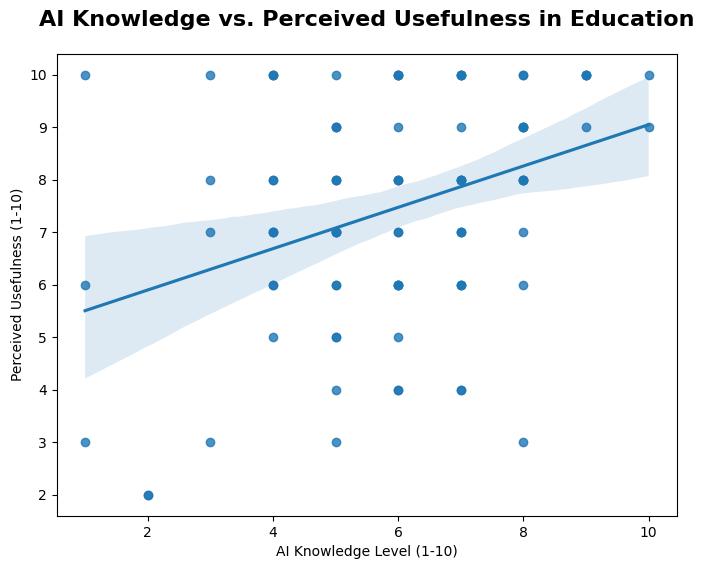

Pearson's correlation: 0.36
P-value: 0.000


In [23]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Q1.AI_knowledge', y='Q7.Utility_grade', data=df)
plt.title('AI Knowledge vs. Perceived Usefulness in Education', fontsize=16, weight='bold', pad=20)
plt.xlabel('AI Knowledge Level (1-10)')
plt.ylabel('Perceived Usefulness (1-10)')
plt.show()

correlation, p_value = stats.pearsonr(df['Q1.AI_knowledge'], df['Q7.Utility_grade'])
print(f"Pearson's correlation: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")




🔹 **Key Observations:**

- There is a **moderate positive correlation** between AI knowledge and perceived usefulness in education, with an upward trend indicating that greater AI awareness aligns with higher perceived utility.
- While variability in the data suggests other influencing factors, this highlights **the potential of improving AI literacy/awareness to enhance acceptance and adoption in academia.**

---

## **AI Knowledge Vs. AI perception**


---

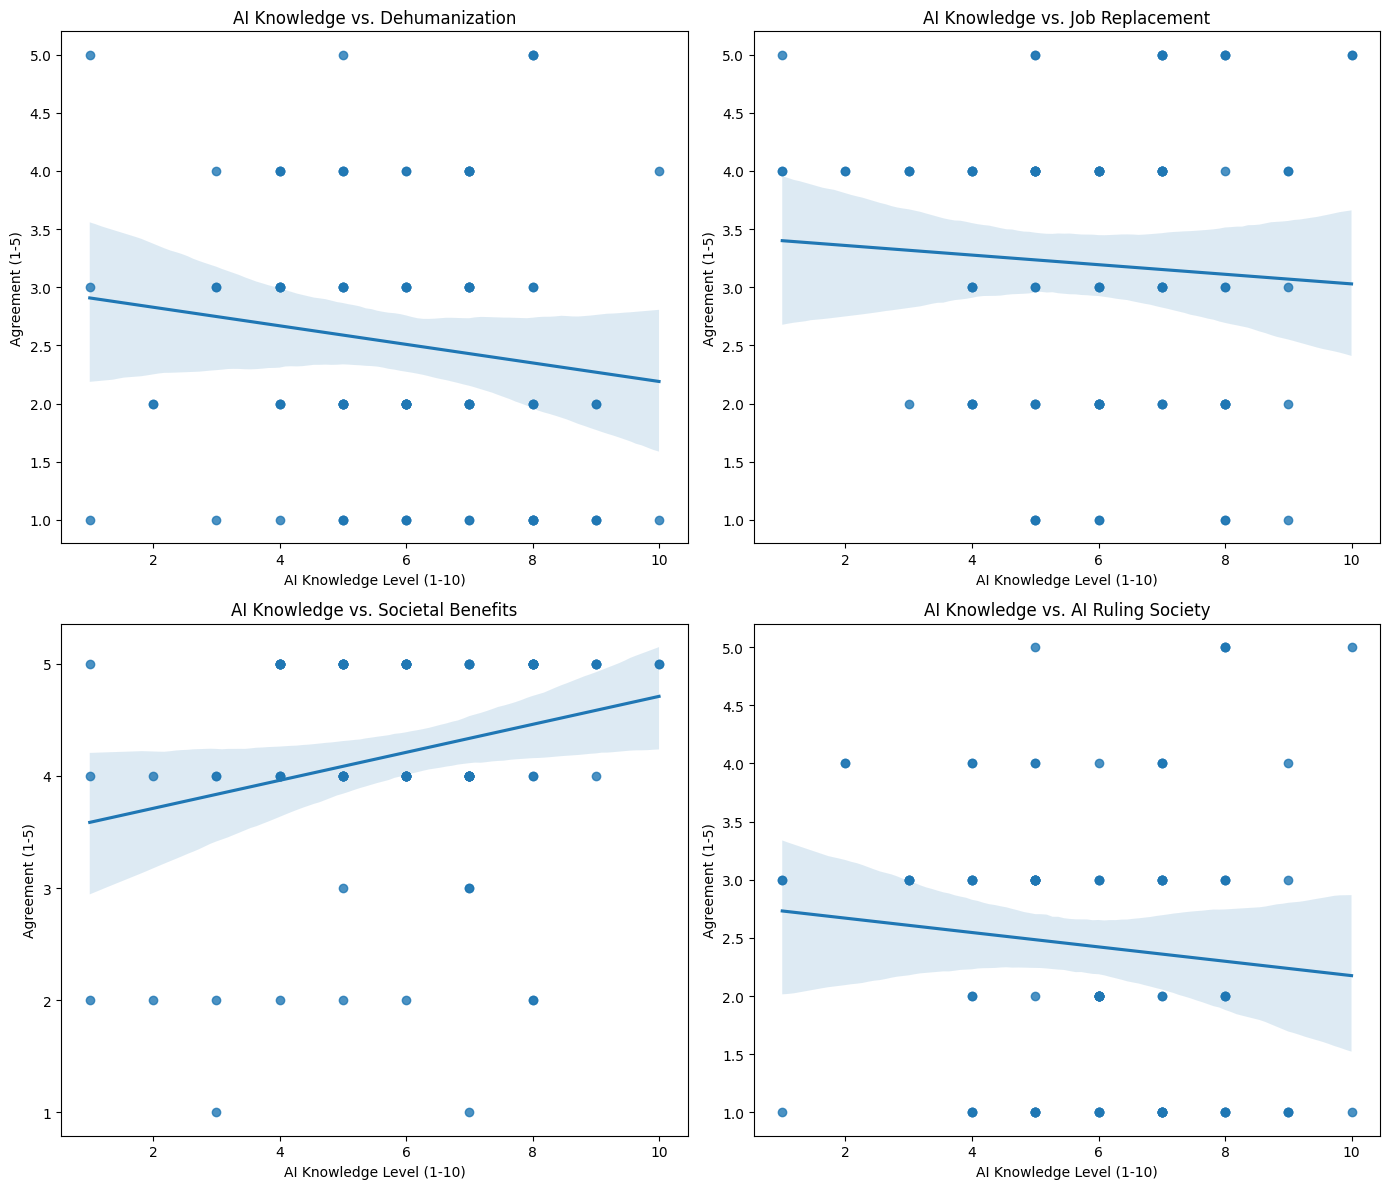

In [24]:
# Set consistent figure size for the overall grid
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 rows, 2 columns

# Scatter plot 1: AI Dehumanization
sns.regplot(x='Q1.AI_knowledge', y='Q3#1.AI_dehumanization', data=df, ax=axes[0, 0])
axes[0, 0].set_title('AI Knowledge vs. Dehumanization', fontsize=12)
axes[0, 0].set_xlabel('AI Knowledge Level (1-10)')
axes[0, 0].set_ylabel('Agreement (1-5)')

# Scatter plot 2: Job Replacement
sns.regplot(x='Q1.AI_knowledge', y='Q3#2.Job_replacement', data=df, ax=axes[0, 1])
axes[0, 1].set_title('AI Knowledge vs. Job Replacement', fontsize=12)
axes[0, 1].set_xlabel('AI Knowledge Level (1-10)')
axes[0, 1].set_ylabel('Agreement (1-5)')

# Scatter plot 3: Societal Benefits
sns.regplot(x='Q1.AI_knowledge', y='Q3#3.Problem_solving', data=df, ax=axes[1, 0])
axes[1, 0].set_title('AI Knowledge vs. Societal Benefits', fontsize=12)
axes[1, 0].set_xlabel('AI Knowledge Level (1-10)')
axes[1, 0].set_ylabel('Agreement (1-5)')

# Scatter plot 4: AI Ruling Society
sns.regplot(x='Q1.AI_knowledge', y='Q3#4.AI_rulling_society', data=df, ax=axes[1, 1])
axes[1, 1].set_title('AI Knowledge vs. AI Ruling Society', fontsize=12)
axes[1, 1].set_xlabel('AI Knowledge Level (1-10)')
axes[1, 1].set_ylabel('Agreement (1-5)')


# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

🔹 **Key Observations:**

1. **AI Knowledge vs. Perception of AI Dehumanization**:
Higher AI knowledge correlates weakly with lower agreement on AI dehumanization. This suggests that individuals who are more knowledgeable about AI might be less likely to view it as a threat to human uniqueness or values, but the trend is not strong.
2. **AI Knowledge vs. Perception of Job Replacement**:
A slight negative trend indicates that higher AI knowledge might reduce concerns about job replacement by AI. However, the relationship is weak, implying that fear of job loss persists across knowledge levels.
3.**AI Knowledge vs. Perception of Societal Benefits**:
A positive correlation indicates that individuals with higher AI knowledge are more likely to agree on the societal benefits of AI. This is the strongest trend among the plots, perhaps suggesting that knowledge improves perception of AI's positive potential.
4.**AI Knowledge vs. Perception of AI Ruling Society**:
Higher AI knowledge is weakly associated with reduced concerns about AI ruling society. This suggests that individuals with greater understanding of AI view it as less of a societal control threat, though variability is high.



---


##  **K-means Clustering : AI Knowledge (Q1) - AI perception (Q3)  - Utility grade (Q7)**  


---



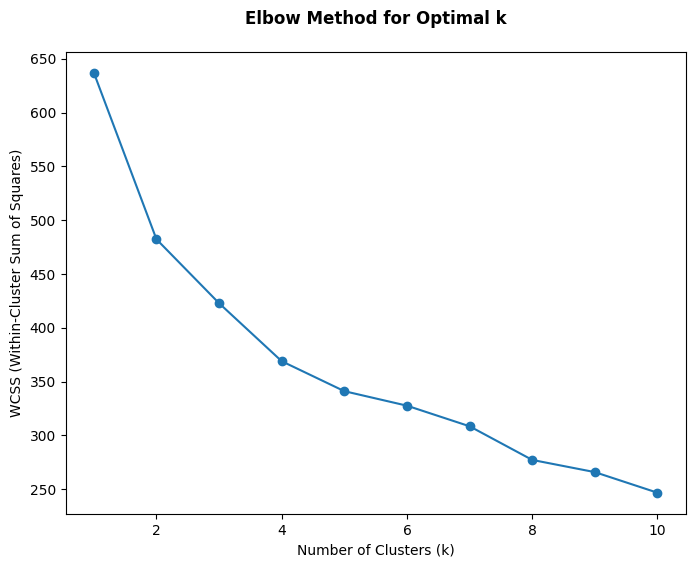

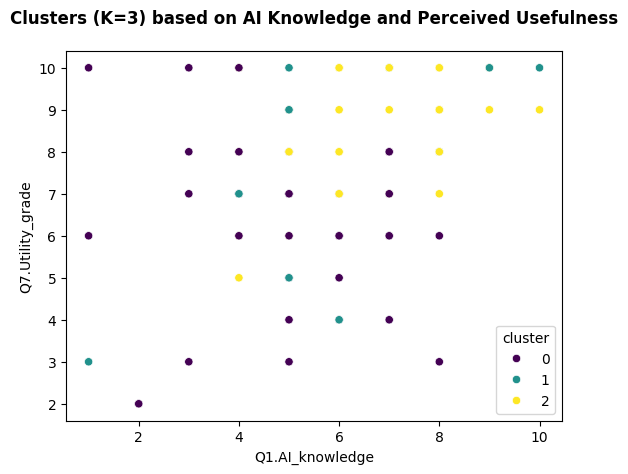


Cluster Means (K=3):

          Q1.AI_knowledge  Q3#1.AI_dehumanization  Q3#2.Job_replacement  \
cluster                                                                  
0               5.102564                3.282051              4.076923   
1               6.600000                1.800000              2.666667   
2               6.486486                2.000000              2.486486   

         Q3#3.Problem_solving  Q3#4.AI_rulling_society  Q7.Utility_grade  
cluster                                                                   
0                    3.769231                  3.25641          6.333333  
1                    4.266667                  2.00000          7.800000  
2                    4.621622                  1.72973          8.459459  





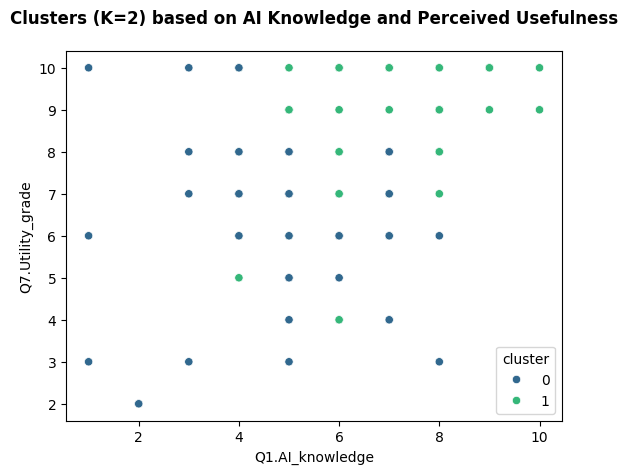


Cluster Means (K=2):

          Q1.AI_knowledge  Q3#1.AI_dehumanization  Q3#2.Job_replacement  \
cluster                                                                  
0               5.022727                3.181818              3.977273   
1               6.744681                1.893617              2.468085   

         Q3#3.Problem_solving  Q3#4.AI_rulling_society  Q7.Utility_grade  
cluster                                                                   
0                    3.704545                 3.090909          6.227273  
1                    4.659574                 1.808511          8.574468  


In [25]:

# 1. K-means Clustering

# a. Data Preparation
features = ['Q1.AI_knowledge', 'Q3#1.AI_dehumanization', 'Q3#2.Job_replacement',
            'Q3#3.Problem_solving', 'Q3#4.AI_rulling_society', 'Q5.Feelings',
            'Q7.Utility_grade']
clustering_data = df[features].copy()

# Encoding 'Q5.Feelings' if it's categorical
if clustering_data['Q5.Feelings'].dtype == 'object':
    # Create a mapping of feelings to numerical values
    feeling_mapping = {feeling: i for i, feeling in enumerate(clustering_data['Q5.Feelings'].unique())}
    # Apply the mapping to the 'Q5.Feelings' column
    clustering_data['Q5.Feelings'] = clustering_data['Q5.Feelings'].map(feeling_mapping)

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# b. Determining Optimal Number of Clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=12, weight='bold', pad=20)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow method, choose the optimal k (e.g., 3)

# c. Applying K-means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# d. Analyzing Clusters
# Calculate cluster means for numerical features only
numerical_features = ['Q1.AI_knowledge', 'Q3#1.AI_dehumanization', 'Q3#2.Job_replacement',
                      'Q3#3.Problem_solving', 'Q3#4.AI_rulling_society', 'Q7.Utility_grade']
cluster_means = df.groupby('cluster')[numerical_features].mean()

# If you want to include Q5.Feelings (now encoded) in the means, add it to numerical_features
# numerical_features.append('Q5.Feelings')

# Visualization (example using scatter plot)
sns.scatterplot(x='Q1.AI_knowledge', y='Q7.Utility_grade', hue='cluster', data=df, palette='viridis')
plt.title('Clusters (K=3) based on AI Knowledge and Perceived Usefulness', fontsize=12, weight='bold', pad=20)
plt.show()

print("\n\033[1m\033[4mCluster Means (K=3):\033[0m\n\n", cluster_means)
print("\n\n")



# 1. K-means Clustering with K=2

# a. Data Preparation (same as before)
features = ['Q1.AI_knowledge', 'Q3#1.AI_dehumanization', 'Q3#2.Job_replacement',
            'Q3#3.Problem_solving', 'Q3#4.AI_rulling_society', 'Q5.Feelings',
            'Q7.Utility_grade']
clustering_data = df[features].copy()

# Encoding 'Q5.Feelings' if it's categorical (same as before)
if clustering_data['Q5.Feelings'].dtype == 'object':
    feeling_mapping = {feeling: i for i, feeling in enumerate(clustering_data['Q5.Feelings'].unique())}
    clustering_data['Q5.Feelings'] = clustering_data['Q5.Feelings'].map(feeling_mapping)

# Scaling the data (same as before)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# b. Applying K-means with K=2
kmeans = KMeans(n_clusters=2, random_state=42)  # Change n_clusters to 2
df['cluster'] = kmeans.fit_predict(scaled_data)

# c. Analyzing Clusters (similar to before, but with 2 clusters)
numerical_features = ['Q1.AI_knowledge', 'Q3#1.AI_dehumanization', 'Q3#2.Job_replacement',
                      'Q3#3.Problem_solving', 'Q3#4.AI_rulling_society', 'Q7.Utility_grade']
cluster_means = df.groupby('cluster')[numerical_features].mean()



# Visualization (example using scatter plot)
sns.scatterplot(x='Q1.AI_knowledge', y='Q7.Utility_grade', hue='cluster', data=df, palette='viridis')
plt.title('Clusters (K=2) based on AI Knowledge and Perceived Usefulness', fontsize=12, weight='bold', pad=20)
plt.show()

print("\n\033[1m\033[4mCluster Means (K=2):\033[0m\n\n", cluster_means)


🔹 **Key Observations:**

**1. Purpose and Elbow Analysis**

We clustered participants by AI knowledge and perceived usefulness. The elbow method indicated k=3, but we also tested k=2 because Clusters 1 and 2 (in the three-cluster model) had very similar AI knowledge means.

**2. K=3 Observations**

Cluster 0: Moderately knowledgeable, somewhat cautious, mid-level on usefulness.

Cluster 1: Higher knowledge, lower concerns about dehumanization, strong optimism.

Cluster 2: Similar to Cluster 1 but just a but more reluctant to accept that AI will rule over socieities.

**3. K=2 Observations**

Cluster 0: Moderate knowledge, lower perceived usefulness, more caution.

Cluster 1: Stronger knowledge and a more positive stance on AI’s potential.

**Conclusion (K=2 Perspective)**

In the scatter plot, the blue cluster 0 leans toward lower AI knowledge and lower perceived usefulness—indicating a more cautious stance. In contrast, the green cluster 1 displays higher AI knowledge and higher perceived usefulness, reflecting a notably more optimistic view. This visual split underscores how greater familiarity with AI might coincide with stronger confidence in its utility.



---

#**3. Conclusion**
___
Students in analytical fields appear **curious and cautiously optimistic** about AI—especially its potential in education and solving societal challenges. **Curiosity** was the most common emotional response, while **fear and distrust were minimal**.  

AI knowledge was **moderate overall**, with students who accessed **multiple sources—particularly books and scientific papers—reporting higher familiarity**. **Digital platforms** (Internet and social media) were the most commonly used, though less predictive of depth.  

There was a **moderate positive correlation (r=0.36)** between AI knowledge and its **perceived usefulness in education**, suggesting that literacy enhances confidence. Clustering analysis reinforced these patterns, revealing two student profiles: one more **knowledgeable and optimistic**, the other more **cautious and less confident**.

---

## **Limitations**

- Small, homogeneous sample from analytical majors.
- Results are **not generalizable** to broader or more diverse populations.

---

## **Looking Ahead**

- **Expand participation** across disciplines, institutions, and cultures.
- Use **larger datasets** to better understand why students engage with AI and which tools or domains they find most valuable.
